In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")

In [2]:
data = pd.read_csv('Breast_cancer_data.csv')

Dataset

In [3]:
data.tail(10)

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
559,11.51,23.93,74.52,403.5,0.09261,1
560,14.05,27.15,91.38,600.4,0.09929,1
561,11.20,29.37,70.67,386.0,0.07449,1
562,15.22,30.62,103.40,716.9,0.10480,0
563,20.92,25.09,143.00,1347.0,0.10990,0
564,21.56,22.39,142.00,1479.0,0.11100,0
565,20.13,28.25,131.20,1261.0,0.09780,0
566,16.60,28.08,108.30,858.1,0.08455,0
567,20.60,29.33,140.10,1265.0,0.11780,0
568,7.76,24.54,47.92,181.0,0.05263,1


Basic EDA

<Axes: >

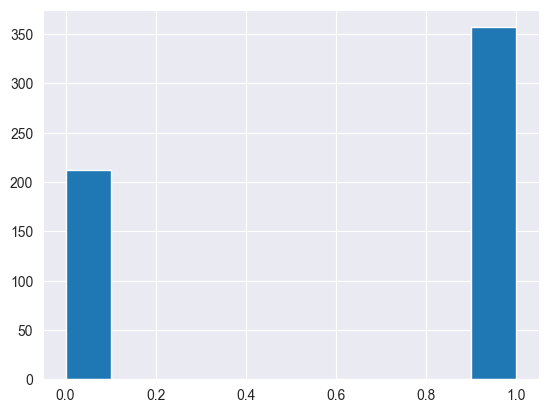

In [4]:
data['diagnosis'].hist()
# plt.tight_layout()

In [5]:
corr = data.iloc[:,:-1].corr(method = 'pearson')

In [6]:
corr

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness
mean_radius,1.000000,0.323782,0.997855,0.987357,0.170581
mean_texture,0.323782,1.000000,0.329533,0.321086,-0.023389
mean_perimeter,0.997855,0.329533,1.000000,0.986507,0.207278
mean_area,0.987357,0.321086,0.986507,1.000000,0.177028
mean_smoothness,0.170581,-0.023389,0.207278,0.177028,1.000000


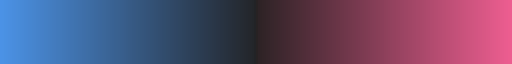

In [7]:
cmap = sns.diverging_palette(250, 354, 80, 60, center = 'dark', as_cmap = True)
cmap

<Axes: >

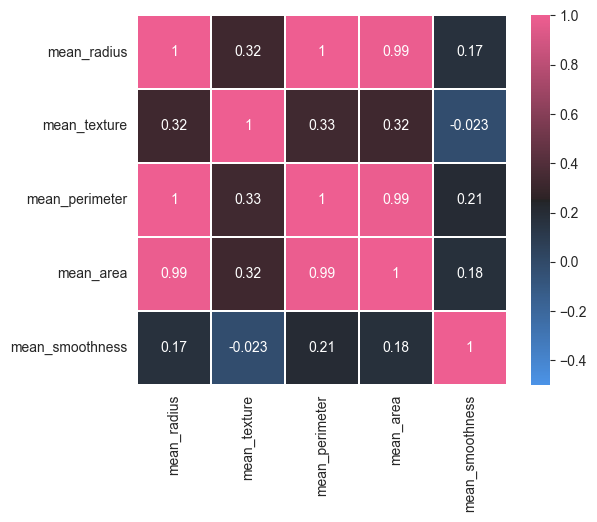

In [8]:
sns.heatmap(corr, vmax = 1, vmin = -0.5, cmap = cmap, square = True, linewidth = 0.2, annot = True)

In [9]:
data = data[['mean_radius', 'mean_texture', 'mean_smoothness', 'diagnosis']]
data.head()

,mean_radius,mean_texture,mean_smoothness,diagnosis
0,17.99,10.38,0.11840,0
1,20.57,17.77,0.08474,0
2,19.69,21.25,0.10960,0
3,11.42,20.38,0.14250,0
4,20.29,14.34,0.10030,0


<Axes: xlabel='mean_texture', ylabel='Count'>

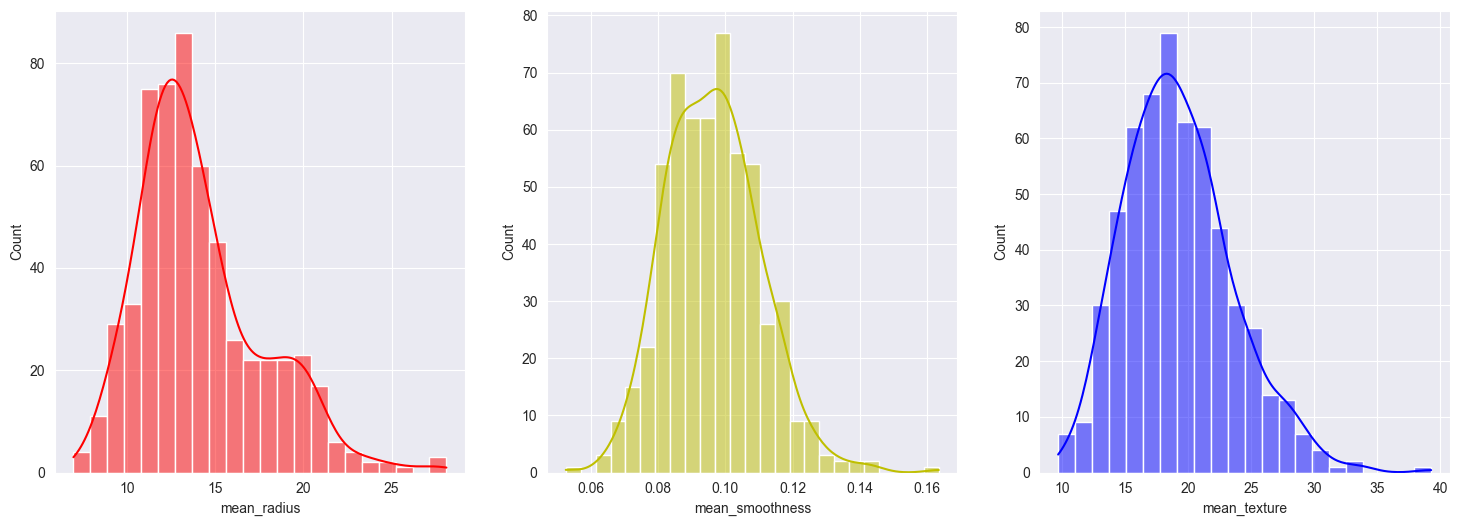

In [10]:
fig, axes = plt.subplots(1, 3, figsize = (18, 6))
sns.histplot(data, ax = axes[0], x = "mean_radius",kde = True, color = 'r')
sns.histplot(data, ax = axes[1], x = 'mean_smoothness', kde = True, color = 'y')
sns.histplot(data, ax = axes[2], x = 'mean_texture', kde = True, color = 'b')


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   mean_radius      569 non-null    float64
 1   mean_texture     569 non-null    float64
 2   mean_smoothness  569 non-null    float64
 3   diagnosis        569 non-null    int64  
dtypes: float64(3), int64(1)
memory usage: 17.9 KB


Gaussian NB

In [12]:
data.describe()

,mean_radius,mean_texture,mean_smoothness,diagnosis
count,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,0.096360,0.627417
std,3.524049,4.301036,0.014064,0.483918
min,6.981000,9.710000,0.052630,0.000000
25%,11.700000,16.170000,0.086370,0.000000
50%,13.370000,18.840000,0.095870,1.000000
75%,15.780000,21.800000,0.105300,1.000000
max,28.110000,39.280000,0.163400,1.000000


In [13]:
from sklearn.naive_bayes import GaussianNB

In [14]:
gnb = GaussianNB()

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
x = data.iloc[:, :-1]
y = data['diagnosis']

In [17]:
len(x), len(y)

(569, 569)

In [18]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [19]:
from sklearn.preprocessing import StandardScaler
stdScaler = StandardScaler()

In [20]:
x_train = stdScaler.fit_transform(x_train)

In [21]:
x_test = stdScaler.transform(x_test)

In [22]:
gnb.fit(x_train, y_train)

GaussianNB()

In [23]:
y_pred = gnb.predict(x_test)

# Accuracy

In [24]:
gnb.score(x_test, y_test)

0.9122807017543859

In [25]:
from sklearn.metrics import confusion_matrix, f1_score

In [26]:
len(y_test)

114

In [27]:
print(confusion_matrix(y_test, y_pred))
print(f1_score(y_test, y_pred))

[[39  8]
 [ 2 65]]
0.9285714285714287


In [28]:
df = pd.DataFrame()
df['cat_mean_radius'] = pd.cut(data['mean_radius'].values, bins = 3, labels = [0, 1, 2])
df['cat_mean_texture'] = pd.cut(data['mean_texture'].values, bins = 3, labels = [0, 1, 2])
df['cat_mean_smoothness'] = pd.cut(data['mean_smoothness'].values, bins = 3, labels = [0, 1, 2])

In [29]:
df.head()

,cat_mean_radius,cat_mean_texture,cat_mean_smoothness
0,1,0,1
1,1,0,0
2,1,1,1
3,0,1,2
4,1,0,1


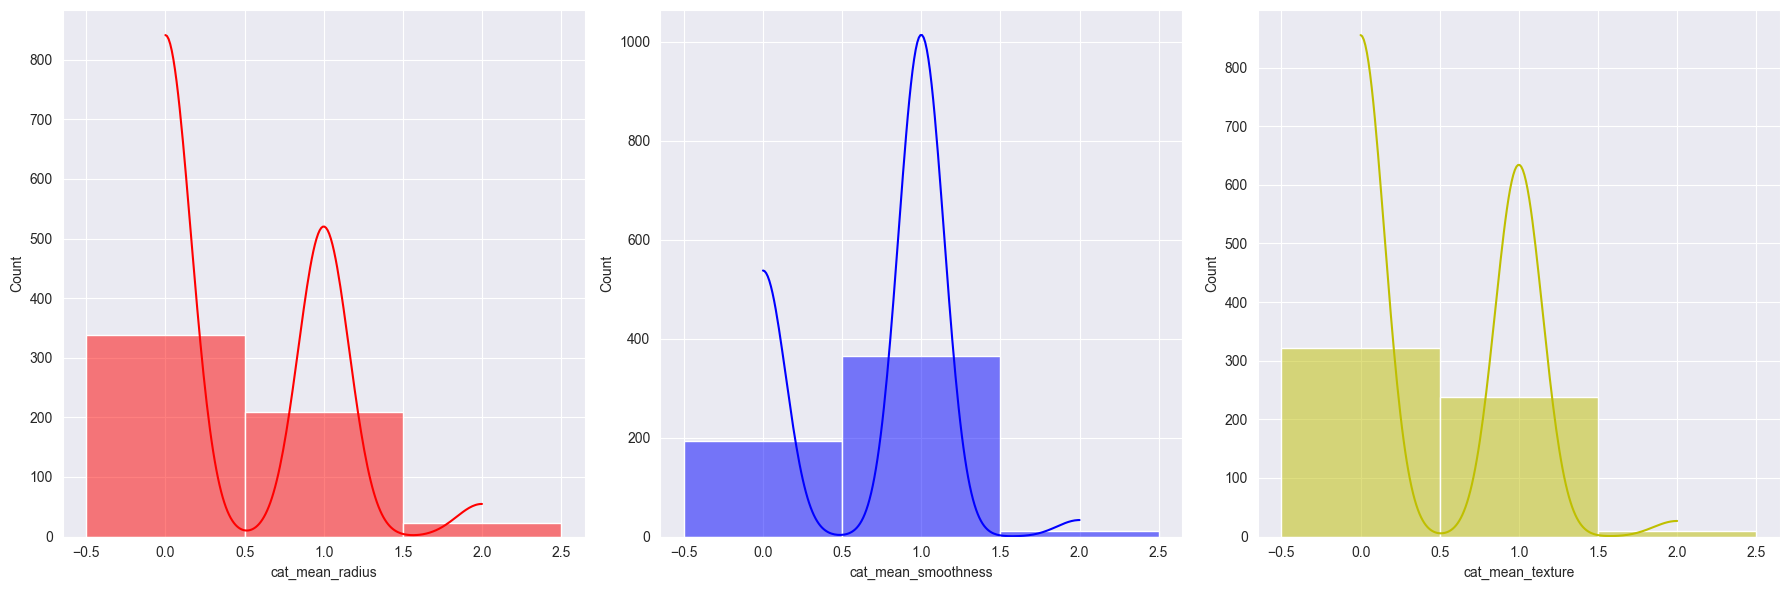

In [30]:
fig, axes = plt.subplots(1, 3, figsize = (18, 6))

# df['cat_mean_radius'].hist(ax = axes[0])
# df['cat_mean_smoothness'].hist(ax = axes[1])
# df['cat_mean_texture'].hist(ax = axes[2])
sns.histplot(df, ax = axes[0], x = 'cat_mean_radius', kde = True, color = 'r')
sns.histplot(df, ax = axes[1], x = 'cat_mean_smoothness', kde = True, color = 'b')
sns.histplot(df, ax = axes[2], x = 'cat_mean_texture', kde = True, color = 'y')
plt.tight_layout()

In [31]:
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
x = df
y = data['diagnosis']

In [34]:
len(x), len(y)

(569, 569)

In [35]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state=0)

In [36]:
x_train.tail()

,cat_mean_radius,cat_mean_texture,cat_mean_smoothness
277,1,1,0
9,0,1,1
359,0,0,1
192,0,0,0
559,0,1,1


In [37]:
print(len(x_train))
print(len(y_train))

455
455


In [38]:
x_train = x_train.astype(float)
mnb.fit(x_train, y_train)

MultinomialNB()

In [39]:
mnb.predict(x_test)

array([1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1], dtype=int64)

In [40]:
mnb.score(x_test, y_test)

0.6491228070175439

In [41]:
len(y_test)

114

In [42]:
print(confusion_matrix(y_test, mnb.predict(x_test)))

[[12 35]
 [ 5 62]]


In [43]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline

# Sample data
X_train = ['Text of the first document', 'Text of the second document', 'and so on...']
y_train = ['class1', 'class2', 'class1']  # Replace with your actual classes

# Create a pipeline that transforms the data to a matrix of token counts and applies Multinomial Naive Bayes
model = make_pipeline(CountVectorizer(), MultinomialNB())

# Train the model
model.fit(X_train, y_train)

# Predict the class of a new document
predicted_class = model.predict(['Text of a new document'])

In [44]:
predicted_class

array(['class1'], dtype='<U6')